In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
data = pd.read_csv("C:\\Users\\Tarek\\Downloads\\archive (1)\\car_prices.csv")
data.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


INFORMATION ABOUT THE DATA

In [3]:
data.shape

(558837, 16)

In [4]:
data.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [5]:
data.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [6]:
data.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [7]:
data.transpose().head()

,0,1,2,3,4,5,6,7,8,9,...,558827,558828,558829,558830,558831,558832,558833,558834,558835,558836
year,2015,2015,2014,2015,2014,2015,2014,2014,2014,2014,...,2014,2012,2012,2012,2011,2015,2012,2012,2015,2014
make,Kia,Kia,BMW,Volvo,BMW,Nissan,BMW,Chevrolet,Audi,Chevrolet,...,Jeep,Dodge,Hyundai,Nissan,BMW,Kia,Ram,BMW,Nissan,Ford
model,Sorento,Sorento,3 Series,S60,6 Series Gran Coupe,Altima,M5,Cruze,A4,Camaro,...,Grand Cherokee,Grand Caravan,Elantra,Sentra,5 Series,K900,2500,X5,Altima,F-150
trim,LX,LX,328i SULEV,T5,650i,2.5 S,Base,1LT,2.0T Premium Plus quattro,LT,...,Laredo,American Value Package,Limited,2.0 SR,528i,Luxury,Power Wagon,xDrive35d,2.5 S,XLT
body,SUV,SUV,Sedan,Sedan,Sedan,Sedan,Sedan,Sedan,Sedan,Convertible,...,SUV,Minivan,Sedan,Sedan,Sedan,Sedan,Crew Cab,SUV,sedan,SuperCrew


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [9]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.0,4.0,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,31.0,13.0,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.0,53399.0,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.0,9680.0,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.0,9750.0,1.0,6900.0,12100.0,18200.0,230000.0


df_no_outlayers VISUALLIZATION AND PROCESSING

In [10]:
data.dropna(inplace = True)

In [11]:
data.sellingprice.shape

(472325,)

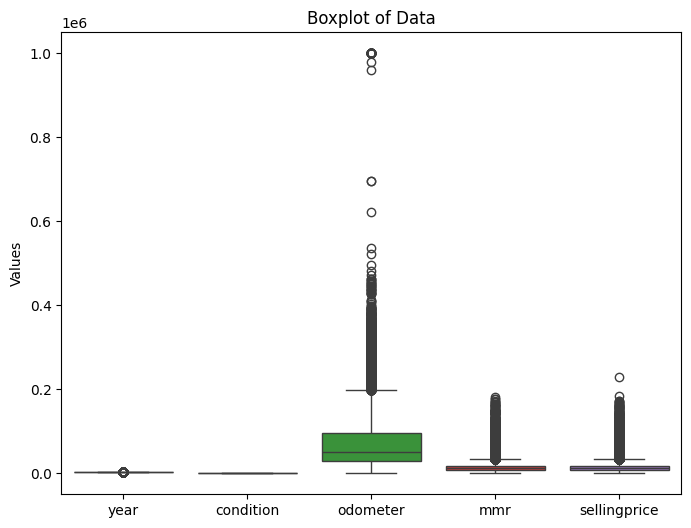

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Boxplot of Data')
plt.ylabel('Values')
plt.show()

In [13]:
Q1 = data.odometer.quantile(0.25)
Q3 = data.odometer.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df_odometer_no_outlayers = data[(data.odometer > lower_limit) & (data.odometer < upper_limit)]
df_odometer_no_outlayers.odometer.shape

(463296,)

In [14]:
q1 = df_odometer_no_outlayers.sellingprice.quantile(0.25)
q3 = df_odometer_no_outlayers.sellingprice.quantile(0.75)

iqr = q3 - q1

LOWER_LIMIT = q1 - 1.5*q1
UPPER_LIMIT = q3 + 1.5*q3

df_no_outlayers = df_odometer_no_outlayers[(df_odometer_no_outlayers.sellingprice > LOWER_LIMIT) & (df_odometer_no_outlayers.sellingprice < UPPER_LIMIT)]
df_no_outlayers.sellingprice.shape

(459108,)

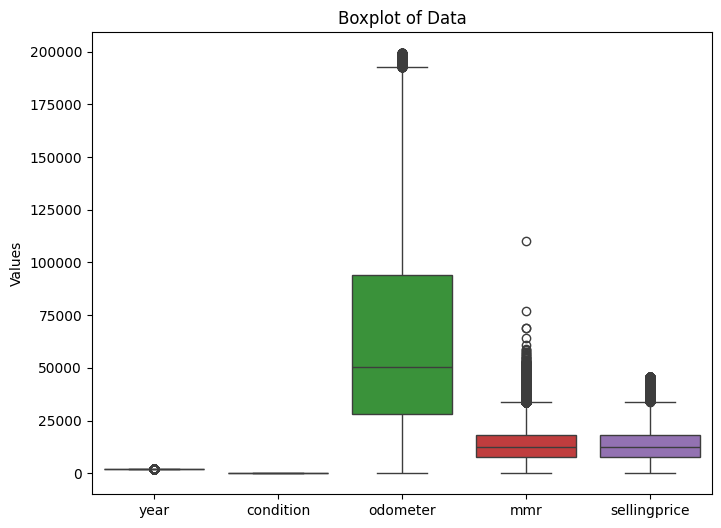

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outlayers)
plt.title('Boxplot of Data')
plt.ylabel('Values')
plt.show()

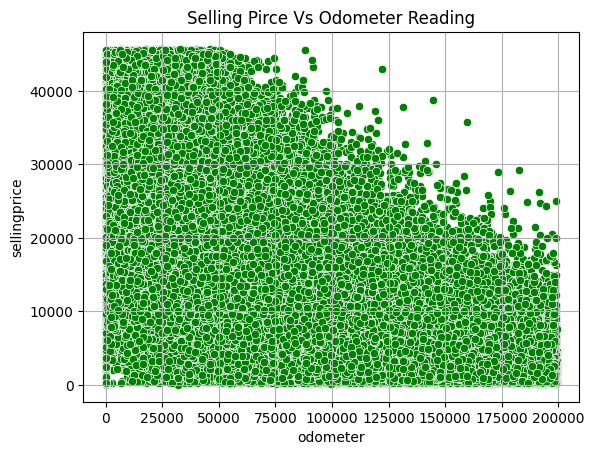

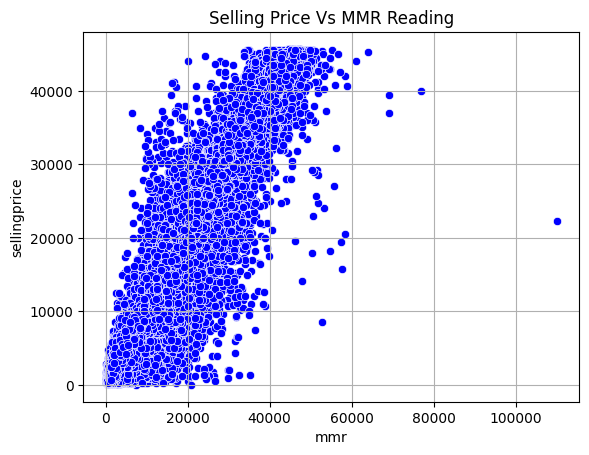

In [16]:
sns.scatterplot(df_no_outlayers, x = "odometer", y = "sellingprice", color = "green")
plt.title("Selling Pirce Vs Odometer Reading")
plt.grid(True)
plt.show()

sns.scatterplot(df_no_outlayers, x = "mmr", y = "sellingprice", color = "blue")
plt.title("Selling Price Vs MMR Reading")
plt.grid(True)
plt.show()

In [17]:
values = df_no_outlayers["make"].value_counts().sort_values(ascending = False)
val = values.values
model = values.index

C:\Users\Tarek\AppData\Local\Temp\ipykernel_16060\124979682.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


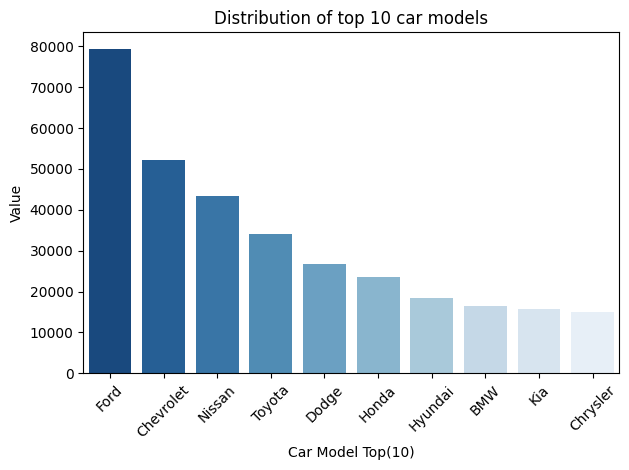

In [18]:
sns.barplot(
    x = model[:10],
    y = val[:10],
    palette = "Blues_r"
)
plt.xlabel("Car Model Top(10)")
plt.ylabel("Value")
plt.title("Distribution of top 10 car models")
plt.xticks(rotation = 45)
plt.tight_layout()

In [19]:
year_df = df_no_outlayers.groupby(by = "year", as_index = "False")["sellingprice"].first()

In [20]:
year_df = pd.DataFrame(year_df)

C:\Users\Tarek\AppData\Local\Temp\ipykernel_16060\1897464492.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(year_df, x = "year", y = "sellingprice", palette = "Blues")


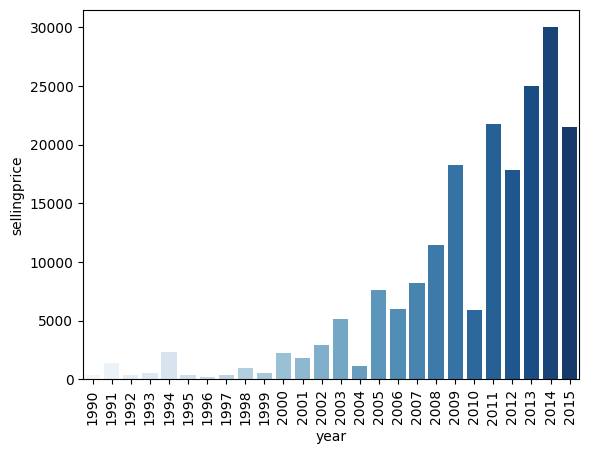

In [21]:
fig = sns.barplot(year_df, x = "year", y = "sellingprice", palette = "Blues")
plt.xticks(rotation = 90)
plt.show()

In [22]:
y = df_no_outlayers['sellingprice']

feature_columns = ['year', 'make', 'model', 'odometer', 'condition']
X = df_no_outlayers[feature_columns]

In [23]:
categorical_columns = ["make", "model"]
numerical_columns = ["year", "odometer", "condition"]

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

In [25]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred)}')
print(f'Linear Regression R² score: {r2_score(y_test, y_pred)}')

Linear Regression MSE: 24019451.346434068
Linear Regression R² score: 0.6608592315641513


In [82]:
print(f'Linear Regression R² score: {r2_score(y_test[-200:], y_pred[-200:])}')

Linear Regression R² score: 0.8456855319520561


In [78]:
y_test[:20].values

array([10900., 13250.,  5700., 11500.,  1100., 18250., 10300., 15500.,
       29500., 13200., 40750., 17000.,  9300., 15300.,  9900.,  2500.,
       11900., 13000.,  3500.,  8100.])

In [65]:
y_pred[:20]

array([11100., 13200.,  4200., 11500.,   400., 20750.,  9250., 15500.,
       26700., 10800., 43500., 21200.,  7100., 16800.,  5600.,  3100.,
       10000., 12900.,  1700.,  8500.])

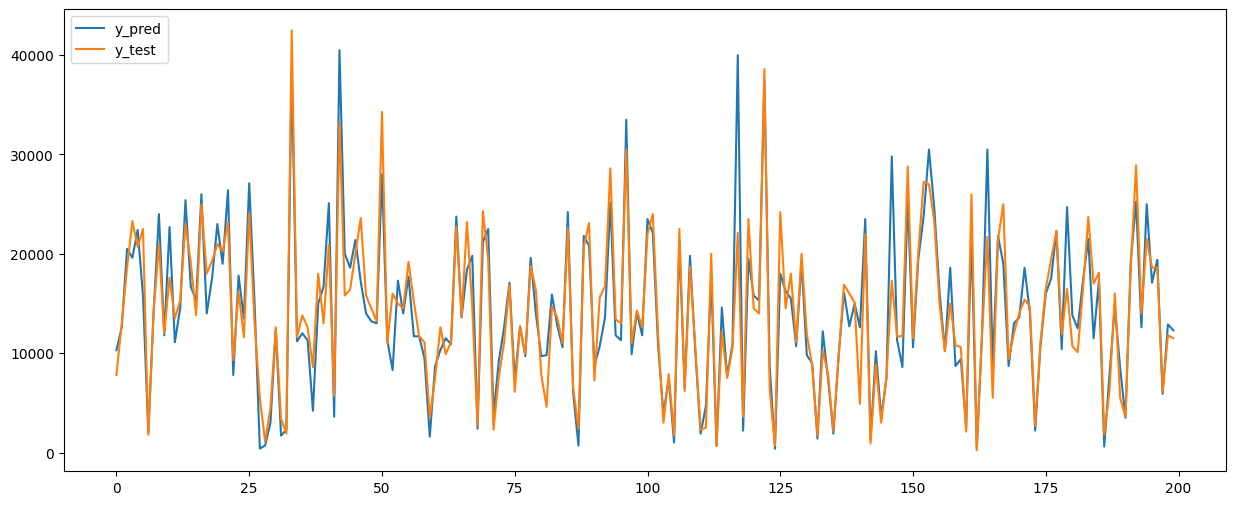

In [83]:
fig, ax = plt.subplots(figsize =(15,6))
plt.plot(y_pred[-200:], label = "y_pred")
plt.plot(y_test[-200:].values, label = "y_test")
plt.legend(loc = "upper left")

In [66]:
#fig, ax = plt.subplots(figsize =(15,6))
#plt.plot(y_pred[:20])
y_test.index
y_test.shape

(91822,)

In [29]:
print(y_test[:10])

520512    10900.0
518257    13250.0
217940     5700.0
552443    11500.0
150206     1100.0
342164    18250.0
359363    10300.0
416163    15500.0
463111    29500.0
76821     13200.0
Name: sellingprice, dtype: float64


In [30]:
print(y_pred[:10])

[16314.41134435 14947.85987316 14185.00822078 20505.74815431
 -1760.50261265 17337.61435696 17300.61395935 17712.095053
 21502.16403209 20411.123675  ]


In [31]:
y = df_no_outlayers["sellingprice"]

feature_columns = ['year', 'make', 'model', 'odometer', 'condition']
X = df_no_outlayers[feature_columns]

In [32]:
numerical_columns = ["year", "odometer", "condition"]
categorical_columns = ["make", "model"]

In [33]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num", "passthrough", numerical_columns),
        ("cat", OneHotEncoder(handle_unknown = "ignore"), categorical_columns)
    ]
)

In [34]:
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor())
])

In [35]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['year', 'odometer',
                                                   'condition']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model'])])),
                ('regressor', DecisionTreeRegressor())])

In [36]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2
#accuracy_percentage = r2 * 100
#print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred).round(2)}')
#print('Linear Regression accuracy score:', accuracy_percentage)

0.8526689452603576

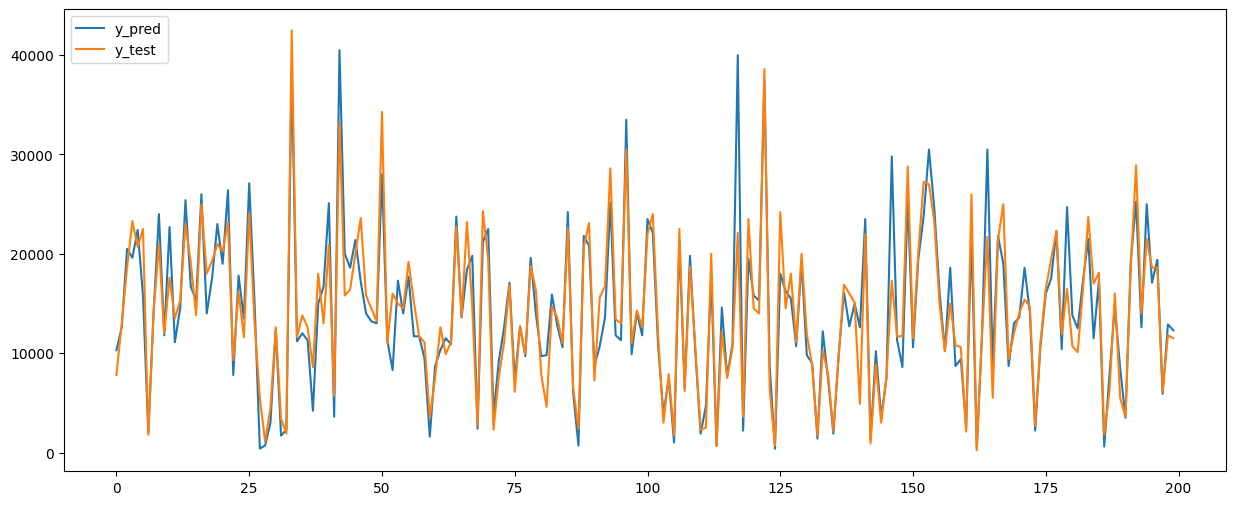

In [84]:
fig, ax = plt.subplots(figsize =(15,6))
plt.plot(y_pred[-200:], label = "y_pred")
plt.plot(y_test[-200:].values, label = "y_test")
plt.legend(loc = "upper left")

In [41]:
y_test[10:20]

189724    40750.0
181818    17000.0
539969     9300.0
273892    15300.0
228718     9900.0
139912     2500.0
403603    11900.0
264147    13000.0
191054     3500.0
311604     8100.0
Name: sellingprice, dtype: float64

In [40]:
print(y_pred[10:20])

[43500. 21200.  7100. 16800.  5600.  3100. 10000. 12900.  1700.  8500.]
